**Install + Import Librariest**

In [40]:
!pip install scikit-learn
!pip install matplotlib

In [41]:
!pip install pandas

In [42]:
# Run these only once
# !pip install pandas matplotlib scikit-learn numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Load and Clean the Dataset**

In [43]:
df = pd.read_csv('vehicles.csv')

# Keep only relevant columns
df = df[['price', 'year', 'odometer', 'manufacturer', 'fuel',
         'transmission', 'drive', 'type', 'paint_color', 'condition', 'cylinders']]

# Drop rows with missing values
df = df.dropna()

# Remove unrealistic data
df = df[(df['price'] > 1000) & (df['price'] < 60000)]
df = df[(df['odometer'] < 300000) & (df['year'] > 1990)]

# Reset index
df.reset_index(drop=True, inplace=True)

# Check result
df.head()

,price,year,odometer,manufacturer,fuel,transmission,drive,type,paint_color,condition,cylinders
0,15000,2013.0,128000.0,ford,gas,automatic,rwd,truck,black,excellent,6 cylinders
1,27990,2012.0,68696.0,gmc,gas,other,4wd,pickup,black,good,8 cylinders
2,34590,2016.0,29499.0,chevrolet,gas,other,4wd,pickup,silver,good,6 cylinders
3,35000,2019.0,43000.0,toyota,gas,automatic,4wd,truck,grey,excellent,6 cylinders
4,29990,2016.0,17302.0,chevrolet,gas,other,4wd,pickup,red,good,6 cylinders


**Visualize Price Distribution**

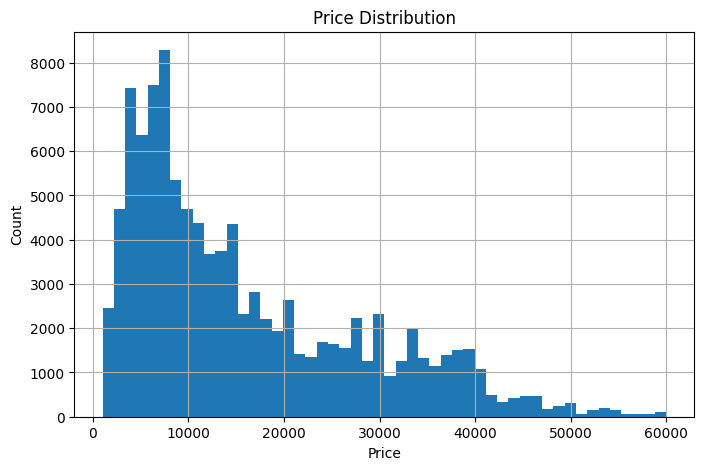

In [44]:
df['price'].hist(bins=50, figsize=(8, 5))
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()

**Prepare Features and Target**

In [45]:
X = df.drop(columns='price')
y = df['price']

**Define Categorical + Numeric Columns**

In [46]:
categorical_cols = ['manufacturer', 'fuel', 'transmission', 'drive',
                    'type', 'paint_color', 'condition', 'cylinders']
numeric_cols = ['year', 'odometer']

**Preprocessing Pipeline**

In [47]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Build Model Pipeline**

In [48]:
# Swap model here if needed
regressor = LinearRegression()
# regressor = RandomForestRegressor(n_estimators=100, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

**Train/Test Split + Train Model**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'condition',
                                                   'cylinders'])])),
                ('regressor', LinearRegression())])

**Evaluate Model**

In [50]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

✅ RMSE: 5686.25
✅ R² Score: 0.78


**Save the Trained Model (car_price_model.pkl)**

In [51]:
import joblib

# Save the trained model
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']